In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('stats_df.csv')

In [3]:
df.shape

(59, 10)

In [4]:
df.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.03010,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.65071,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.73248,0.520000,32
3,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.76120,-0.386900,32
4,Switzerland,2014,0.387692,0.550769,0.138462,0.213077,0.050769,1.95430,0.059230,16


In [5]:
y = df['results']


In [6]:
X = df.drop(columns=['results'])

In [7]:
X.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.03010,0.160000
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.65071,0.163846
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.73248,0.520000
3,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.76120,-0.386900
4,Switzerland,2014,0.387692,0.550769,0.138462,0.213077,0.050769,1.95430,0.059230


<AxesSubplot:xlabel='goals_z'>

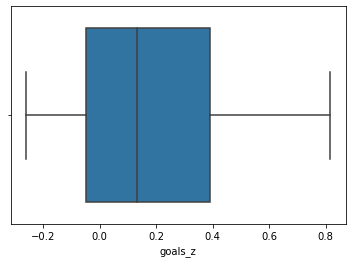

In [8]:
import seaborn as sns
sns.boxplot(x=df['goals_z'])

In [9]:
import matplotlib.pyplot as plt


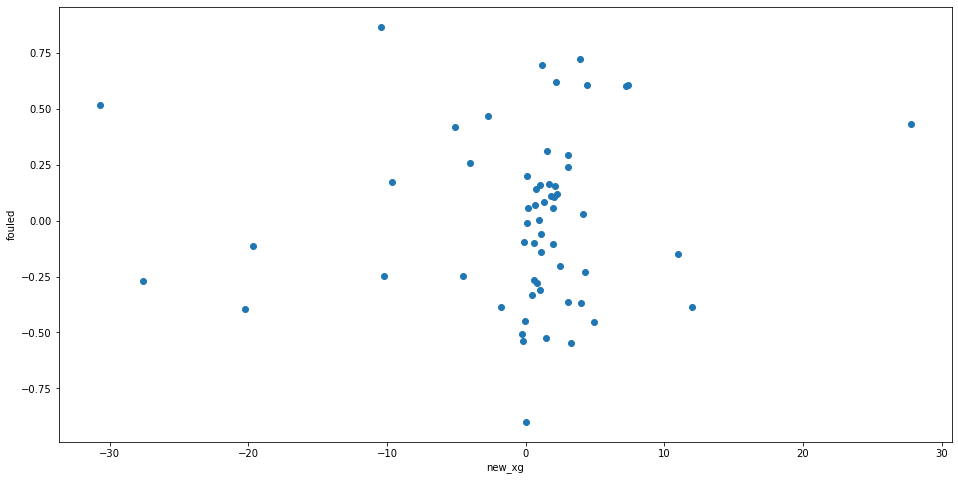

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['new_xg'], df['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

In [11]:
from scipy import stats
import numpy as np


In [16]:
X = X.drop(columns=['Country'])


In [17]:
z = np.abs(stats.zscore(X))
print(z)

        Year   goals_z      xg_z  boxtouches_z  progpasses_z  progruns_z  \
0   1.383919  2.447511  0.978825      0.460605      1.535615    0.173748   
1   0.127746  2.214890  1.828752      0.890457      1.425148    0.034652   
2   1.128426  0.890618  1.400618      3.800067      2.504213    1.779314   
3   1.383919  1.480898  0.632230      0.530835      0.366065    0.695838   
4   0.127746  0.824970  1.134220      0.500791      0.978868    0.400496   
5   1.128426  0.272492  0.227209      0.371375      0.545911    0.184471   
6   1.383919  0.039871  1.086652      1.692393      1.441800    3.021654   
7   0.127746  0.281216  1.073966      0.876592      0.170136    0.685599   
8   1.128426  0.080579  1.670182      1.375779      1.215328    1.905072   
9   1.383919  1.368724  0.036926      0.614034      1.242537    0.078478   
10  0.127746  0.355585  1.045424      0.179555      2.137861    0.342621   
11  1.128426  0.772631  0.451463      0.782741      0.136829    0.000355   
12  1.383919

In [20]:
threshold = 2
print(np.where(z > 2))

(array([ 0,  1,  2,  2,  2,  6, 10, 16, 16, 16, 24, 31, 35, 35, 37, 44, 46,
       58]), array([1, 1, 3, 4, 6, 5, 4, 2, 3, 5, 6, 6, 4, 6, 3, 7, 6, 7]))


In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             8.000000
goals_z          0.441539
xg_z             0.344615
boxtouches_z     0.389231
progpasses_z     0.324231
progruns_z       0.387308
new_xg           2.811636
Fouled           0.497288
results         24.000000
dtype: float64


In [26]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_38588/573165499.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_38588/573165499.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


    Country  Fouled   Year  boxtouches_z  goals_z  new_xg  progpasses_z  \
0     False   False  False         False    False   False         False   
1     False   False  False         False    False   False         False   
2     False   False  False         False    False    True         False   
3     False   False  False         False    False   False         False   
4     False   False  False         False    False   False         False   
5     False   False  False         False    False   False         False   
6     False   False  False         False    False   False         False   
7     False   False  False         False    False   False         False   
8     False   False  False         False    False   False         False   
9     False   False  False         False    False   False         False   
10    False   False  False         False    False   False         False   
11    False   False  False         False    False   False         False   
12    False   False  Fals

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [35]:
df_no_year = df.drop(columns=['Year'])

In [27]:
df_z = df[(z < 3).all(axis=1)]

In [30]:
df_z.shape

(55, 10)

In [41]:
df_no_year.shape

(59, 9)

In [45]:
df_no_year['results'].value_counts()

32    26
16    13
8      8
3      3
1      3
2      3
4      3
Name: results, dtype: int64

In [38]:
df_z = df_no_year[(z < 3).all(axis=1)]

In [40]:
df_z.shape

(55, 9)

In [43]:
df_z['results'].value_counts()



32    25
16    13
8      7
3      3
4      3
1      2
2      2
Name: results, dtype: int64

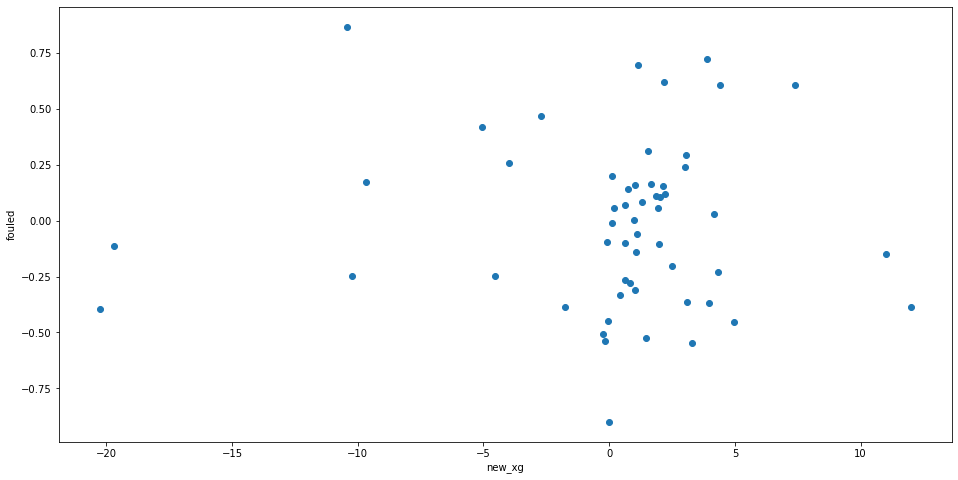

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['new_xg'], df_z['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
y = df_z['results']

In [55]:
X = df_z.drop(columns=['results', 'Country'])

In [56]:
reg = LinearRegression().fit(X, y)

In [98]:
r_sq = reg.score(X, y)

In [99]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.474016958077341


In [58]:
reg.coef_

array([-32.20032869,   4.49778614,  -1.8955418 ,   5.84712598,
        -2.2202453 ,  -0.1936012 ,  -0.76747218])

In [101]:
print(f"slope: {reg.coef_}")

slope: [-37.41901487   8.29672777  -1.08486823   5.92916766   3.18304066
  -0.60592584  -5.92967329]


In [59]:
reg.intercept_

25.487031332738766

In [100]:
print(f"intercept: {reg.intercept_}")

intercept: 23.798946311338536


In [103]:
y_pred = reg.predict(X)

In [104]:
print(f"predicted response:\n{y_pred}")

predicted response:
[-6.31006553  1.38233971 36.56047516 13.60085466 16.66762505 13.0688307
 18.13390312  6.15095017 23.27724333 10.27695944  9.87975206  9.10765502
  7.22519578 12.39841798 10.8281224  21.62655909  7.7160253  14.52320026
 21.95966955 30.42652491  6.42943736  5.89863612  6.66918026  9.14093425
 19.7548365  16.03654068 21.1043152  26.08453937 33.25088319 23.39976023
 16.13619721 44.93349974 29.75200001 12.89574175  5.95106942 21.57002892
 21.06381594 21.48745245 25.46540169 34.08087448 28.49885708 36.04981721
 41.39966006 30.99694305 19.30606874 14.88930002 31.84404696 29.28603836
 26.88901811 28.91837348 11.05852261 35.29310419 14.03939824  8.04539611
 36.28447325]


In [108]:
y_pred = reg.intercept_ + np.sum(reg.coef_ * X, axis=1)

In [109]:
print(f"predicted response:\n{y_pred}")

predicted response:
0     -6.310066
1      1.382340
3     36.560475
4     13.600855
5     16.667625
7     13.068831
8     18.133903
9      6.150950
10    23.277243
11    10.276959
12     9.879752
13     9.107655
14     7.225196
15    12.398418
16    10.828122
17    21.626559
18     7.716025
19    14.523200
20    21.959670
21    30.426525
22     6.429437
23     5.898636
25     6.669180
26     9.140934
27    19.754837
28    16.036541
29    21.104315
30    26.084539
32    33.250883
33    23.399760
34    16.136197
35    44.933500
36    29.752000
37    12.895742
38     5.951069
39    21.570029
40    21.063816
41    21.487452
42    25.465402
43    34.080874
44    28.498857
45    36.049817
46    41.399660
47    30.996943
48    19.306069
49    14.889300
50    31.844047
51    29.286038
52    26.889018
53    28.918373
54    11.058523
55    35.293104
56    14.039398
57     8.045396
58    36.284473
dtype: float64


## Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

In [61]:
clf = Ridge(alpha=1.0)

In [64]:
clf.fit(X, y)

Ridge()

## Lasso Regression

In [65]:
from sklearn import linear_model


In [66]:
clf = linear_model.Lasso(alpha=0.1)

In [67]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [68]:
print(clf.coef_)

[-29.57458681   0.          -0.           3.11498717  -1.25726675
  -0.19238637  -0.20927395]


In [69]:
print(clf.intercept_)

25.487633991061436


## Elastic Net

In [70]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [71]:
regr = ElasticNet(random_state=0)

In [72]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [73]:
print(regr.coef_)

[-2.70616492 -0.4777937  -0.40603345 -0.         -0.60921743 -0.56780944
 -0.536448  ]


In [74]:
print(regr.intercept_)

20.80977534847244


In [76]:
# print(regr.predict([[0, 0]]))

### SGDRegressor

In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [79]:
reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

## RANSAC (RANdom SAmple Consensus) algorithm

In [80]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

In [81]:
reg = RANSACRegressor(random_state=0).fit(X, y)

In [82]:
reg.score(X, y)

0.4260572476271489

In [84]:
# reg.predict(X[:1,])

## TheilSenRegressor

In [85]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

In [86]:
reg = TheilSenRegressor(random_state=0).fit(X, y)

In [87]:
reg.score(X, y)

0.474016958077341

In [88]:
# reg.predict(X[:1,])

## ElasticNetCV

In [89]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

In [90]:
regr = ElasticNetCV(cv=5, random_state=0)

In [91]:
regr.fit(X, y)

ElasticNetCV(cv=5, random_state=0)

In [92]:
print(regr.alpha_)

0.03936944697992264


In [93]:
print(regr.intercept_)

24.89124566310155


In [95]:
# print(regr.predict([[0, 0]]))

In [112]:
df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32
3,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.761200,-0.386900,32
4,Switzerland,2014,0.387692,0.550769,0.138462,0.213077,0.050769,1.954300,0.059230,16
5,Switzerland,2018,0.241538,0.330769,0.181538,0.113077,0.286923,2.143300,0.156100,16
6,Spain,2010,0.180000,0.539231,0.868462,0.320000,1.432308,7.230700,0.603070,1
7,Spain,2014,0.243846,0.536154,0.596923,-0.052308,0.489231,3.889500,0.724615,32
8,Spain,2018,0.190769,0.680769,0.763077,0.267692,0.981538,7.375000,0.605385,16
9,Portugal,2010,0.531538,0.284615,0.100769,-0.300000,0.180769,0.635310,-0.266100,16


## 2022 Teams

In [111]:
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Spain', 'Russia'),
            ('France', 'Mexico'),
            ('England', 'Germany'),
            ('Portugal', 'Switzerland')]

In [ ]:
ger2020 = ['goals': 2.7]